<a href="https://colab.research.google.com/github/Praneetb2929/AiMl-ElevateLab-1/blob/main/Task_7__Support_Vector_Machines_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load & Explore Dataset**

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.head())
print(df.info())
print(df.describe())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

# **Train/Test Split + Scaling**

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

X = df.drop("target", axis=1)
y = df['target']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Train SVM (Linear Kernel)**

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
print("Accuracy (Linear SVM):", accuracy_score(y_test, y_pred_linear))
print(confusion_matrix(y_test, y_pred_linear))
print(classification_report(y_test, y_pred_linear))

Accuracy (Linear SVM): 0.956140350877193
[[41  2]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



# **Train SVM (RBF Kernel)**

In [9]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
print("Accuracy (RBF SVM):", accuracy_score(y_test, y_pred_rbf))
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))

Accuracy (RBF SVM): 0.9824561403508771
[[41  2]
 [ 0 71]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# **Hyperparameter Tuning (C & Gamma)**

In [10]:
C_values = [0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1]

best_acc = 0
best_params = None

for C in C_values:
    for gamma in gamma_values:
        svm_temp = SVC(kernel='rbf', C=C, gamma=gamma)
        scores = cross_val_score(svm_temp, X, y, cv=5)
        mean_score = scores.mean()

        print(f"C={C}, gamma={gamma}, accuracy={mean_score:.4f}")

        if mean_score > best_acc:
            best_acc = mean_score
            best_params = (C, gamma)

print("\nBest Params:", best_params)
print("Best CV Accuracy:", best_acc)


C=0.1, gamma=0.001, accuracy=0.6274
C=0.1, gamma=0.01, accuracy=0.6274
C=0.1, gamma=0.1, accuracy=0.6274
C=1, gamma=0.001, accuracy=0.9226
C=1, gamma=0.01, accuracy=0.6256
C=1, gamma=0.1, accuracy=0.6274
C=10, gamma=0.001, accuracy=0.9086
C=10, gamma=0.01, accuracy=0.6274
C=10, gamma=0.1, accuracy=0.6274

Best Params: (1, 0.001)
Best CV Accuracy: 0.9226207110697097


# **Decision Boundary Visualization**

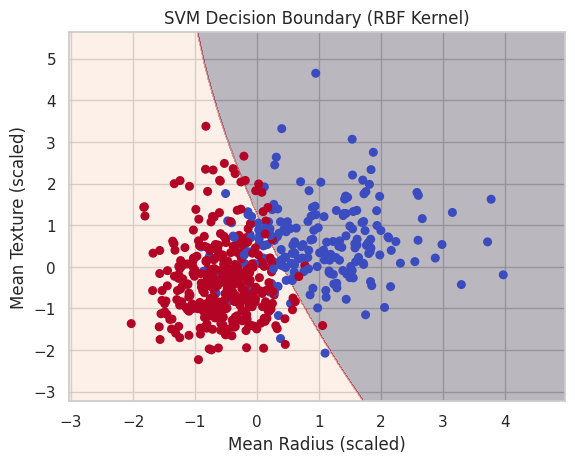

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


# Make plots prettier
sns.set(style="whitegrid")


# Select only 2 features
X_2D = df[['mean radius', 'mean texture']]
y_2D = df['target']

# Scale
sc = StandardScaler()
X_2D_scaled = sc.fit_transform(X_2D)

# Train SVM
svm_vis = SVC(kernel='rbf', C=1, gamma=0.01)
svm_vis.fit(X_2D_scaled, y_2D)

# Plot decision boundary
x_min, x_max = X_2D_scaled[:, 0].min() - 1, X_2D_scaled[:, 0].max() + 1
y_min, y_max = X_2D_scaled[:, 1].min() - 1, X_2D_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_2D_scaled[:, 0], X_2D_scaled[:, 1], c=y_2D, s=30, cmap='coolwarm')
plt.title("SVM Decision Boundary (RBF Kernel)")
plt.xlabel("Mean Radius (scaled)")
plt.ylabel("Mean Texture (scaled)")
plt.show()
